# (Deep) CNNs for Image Colorization

#### (a) This project uses a convolutional neural network for image colorization which turns a grayscale image to a colored image.4 By converting an image to grayscale, we loose color information, so converting a grayscale image back to a colored version is not an easy job. We will use the CIFAR-10 dataset. Downolad the dataset from http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz. 

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import pickle
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2grey
from sklearn.cluster import KMeans
% matplotlib inline

C:\Users\tanay\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

#### (b) From the train and test dataset, extract the class birds. We will focus on this class, which has 6000 members.

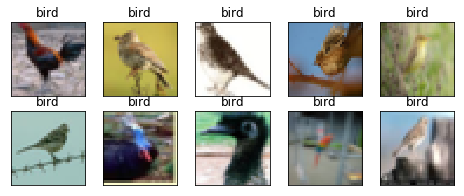

In [3]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==2)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[2])
    plt.imshow(im)
plt.show()

In [4]:
idx = np.where(train_labels[:]==2)[0]
features_idx = train_features[idx,::]
tidx=(np.where(test_labels[:]==2)[0])
tfeatures_idx = test_features[tidx,::]

In [5]:
data=np.concatenate((features_idx, tfeatures_idx),axis=0)

In [6]:
features_idx.shape, tfeatures_idx.shape

((5000, 32, 32, 3), (1000, 32, 32, 3))

#### (e) Use any tool (e.g., openCV or scikit-learn) to obtain grayscale 32×32×1 images from the original 32×32×3 images. The grayscale images are inputs of your network.

In [7]:
greydata=[]
for i in range(data.shape[0]):
    greydata.append(rgb2grey(data[i]))

In [8]:
greydata=np.asarray(greydata)

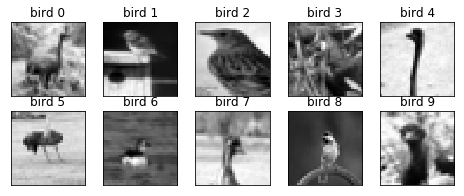

In [9]:
fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = greydata[i]
    ax.set_title(class_names[2]+" "+str(i))
    plt.imshow(im,cmap='gray')
plt.show()

In [10]:
data.shape

(6000, 32, 32, 3)

In [11]:
pixels=data.reshape(6000*1024, 3)

#### (c) Those 6000 images have 6000×32×32 pixels. Choose at least 10% of the pixels randomly. It is strongly recommended that you choose a large number or all of the pixels. You will have between P = 614400 and P = 6144000 pixels. Each pixel is an RGB vector with three elements. 

In [12]:
pixels.shape

(6144000, 3)

In [13]:
kmeans = KMeans(n_clusters=4).fit(pixels)
kmeans.cluster_centers_

array([[109.08107519, 108.73208866,  82.82259944],
       [206.65589676, 211.92599651, 211.61746546],
       [ 49.08775648,  50.0648629 ,  38.59821773],
       [156.39404799, 155.71039933, 135.77683075]])

In [14]:
kmeans.labels_

array([3, 0, 0, ..., 3, 3, 3])

In [15]:
mainpix=keras.utils.to_categorical(kmeans.labels_, num_classes=4)

In [16]:
maincol=mainpix.reshape(6000, 32, 32, 4)

#### (d) Run k-means clustering on the P vectors using k = 4. The centers of the clusters will be your main colors. Convert the colored images to k-color images by converting each pixel’s value to the closest main color in terms of Euclidean distance. These are the outputs of your network, whose each pixel falls in one of those k classes. 

In [17]:
for i in range(len(kmeans.labels_)):
    pixels[i]=kmeans.cluster_centers_[kmeans.labels_[i]]

In [18]:
newpix=pixels.reshape(6000, 32, 32, 3)

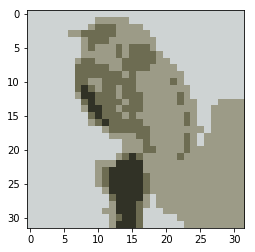

In [19]:
plt.imshow(newpix[20])
plt.show()

#### (f) Set up a deep convolutional neural network with two convolution layers and two MLP layers with. Use 5×5 ﬁlters and a softmax layer. Determine the number of ﬁlters, strides, and whether or not to use padding yourself. Use a minimum of one max pooling layer. Your input is a grayscale version of an image (32×32×1) and the output is a 32×32×3 image that is colored using the main colors. Use a classiﬁcation scheme, which means your output must determine one of the k color classes for each pixel in your grayscale image. Train at least for 5 epochs. Plot training, (validation), and test errors in each epoch. Report the train and test errors and visually compare the artiﬁcially colored versions of the ﬁrst 10 images in the test set with the original images.


In [29]:
model = Sequential()
model.add(Conv2D(128, (5, 5),strides=(1,1), input_shape = (32, 32,1),padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(1,1),padding='same'))
model.add(Conv2D(128, (5, 5),strides=(1,1), input_shape = (32, 32,1),padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(1,1),padding='same'))
model.add(Dense(64, activation = 'softmax'))
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 128)       3328      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       409728    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 64)        8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 4)         260       
Total params: 421,572
Trainable params: 421,572
Non-trainable params: 0
_________________________________________________________________


Train on 5920 samples, validate on 60 samples
Epoch 1/30
5920/5920 [==============================] - 8s 1ms/step - loss: 1.1749 - acc: 0.4870 - val_loss: 1.1687 - val_acc: 0.4606
Epoch 2/30
5920/5920 [==============================] - 8s 1ms/step - loss: 1.1544 - acc: 0.4921 - val_loss: 1.1474 - val_acc: 0.4666
Epoch 3/30
5920/5920 [==============================] - 8s 1ms/step - loss: 1.1341 - acc: 0.4974 - val_loss: 1.1270 - val_acc: 0.4700
Epoch 4/30
2624/5920 [============>.................] - ETA: 4s - loss: 1.1209 - acc: 0.49985920/5920 [==============================] - 8s 1ms/step - loss: 1.1146 - acc: 0.5018 - val_loss: 1.1076 - val_acc: 0.4742
Epoch 5/30
5920/5920 [==============================] - 8s 1ms/step - loss: 1.0961 - acc: 0.5057 - val_loss: 1.0896 - val_acc: 0.4768
Epoch 6/30
5920/5920 [==============================] - 8s 1ms/step - loss: 1.0789 - acc: 0.5090 - val_loss: 1.0731 - val_acc: 0.4803
Epoch 7/30
5536/5920 [===========================>..] - ETA: 0s - los

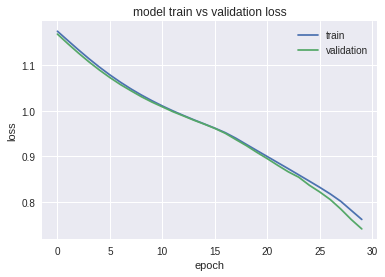

In [37]:
history=model.fit(greydata[:5980].reshape(5980,32,32,1), maincol[:5980],epochs=30 , validation_split=0.01)
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
N=10
y=model.predict(greydata[:N].reshape(N,32,32,1))

In [39]:
model.evaluate(greydata[:N].reshape(N,32,32,1),maincol[:N])

10/10 [==============================] - 0s 2ms/step


[0.7815860509872437, 0.6080077886581421]

In [0]:
y_T=model.predict(greydata[5980:].reshape(20,32,32,1))

In [47]:
model.evaluate(greydata[5980:].reshape(20,32,32,1),maincol[5980:])

20/20 [==============================] - 0s 845us/step


[0.782894492149353, 0.6222168207168579]

In [40]:
y.shape

(10, 32, 32, 4)

In [41]:
result=data[:N]
result.shape

(10, 32, 32, 3)

In [0]:
for k in range(y.shape[0]):
    op=data[k].reshape(1024,3)
    temp=y[k].reshape(1024,4)
    for i in range(temp.shape[0]):
        op[i]=kmeans.cluster_centers_[np.argmax(temp[i])]
    result[k]=op.reshape(32,32,3)    



...............Predicted Images..............


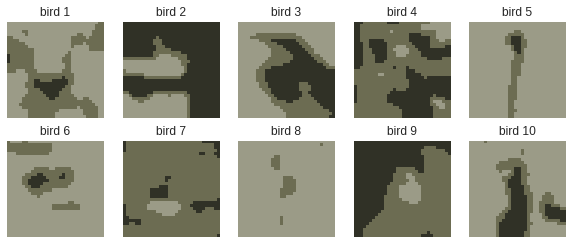

...............Input Greyscaled Images...............


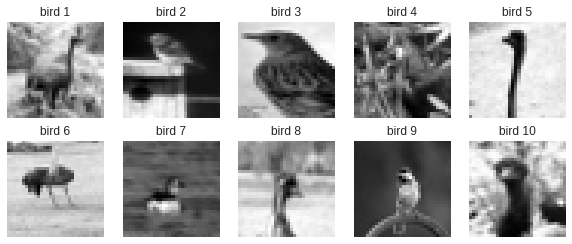

...............K Colored Images...............


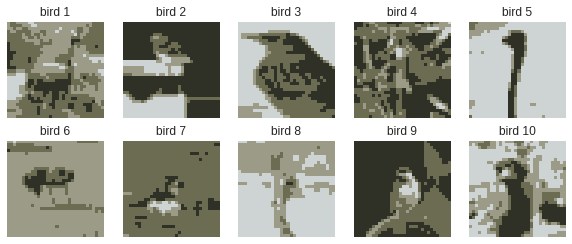

In [43]:
fig = plt.figure(figsize=(10,4))
print("\n\n...............Predicted Images..............")
for i in range(N):
    ax = fig.add_subplot(N/5, N/2, 1 + i, xticks=[], yticks=[])
    im = result[i]
    ax.set_title(class_names[2]+" "+str(i+1))
    plt.imshow(im,cmap='gray')
plt.show()

fig = plt.figure(figsize=(10,4))
print("...............Input Greyscaled Images...............")
for i in range(N):
    ax = fig.add_subplot(2,N/2, 1 + i, xticks=[], yticks=[])
    im = greydata[i]
    ax.set_title(class_names[2]+" "+str(i+1))
    plt.imshow(im,cmap='gray')
plt.show()

print("...............K Colored Images...............")
fig = plt.figure(figsize=(10,4))

for i in range(N):
    ax = fig.add_subplot(2, N/2, 1 + i, xticks=[], yticks=[])
    im = newpix[i]
    ax.set_title(class_names[2]+" "+str(i+1))
    plt.imshow(im,cmap='gray')
plt.show()



(g) Extra Practice: Repeat the whole exercise with k = 16,24,32 colors if your computer can handle the computations.

## Conclusion
The Train Loss and Accuracy of the model is *0.7815860509872437 and 0.6080077886581421*

The Test Loss and Accuracy of the model is *0.782894492149353 and 0.6222168207168579*
